# Hurricane Data Analysis

###  Fetching the data and cleaning:

First, the data of the category 4 and category 5 hurricane present in the tabular form in Wikipedia is extracted, cleaned and stored in the data frame format. <br/>

Category 4 - https://en.wikipedia.org/wiki/List_of_Category_4_Atlantic_hurricanes

Category 5 - https://en.wikipedia.org/wiki/List_of_Category_5_Atlantic_hurricanes

After few preliminary formatting and cleaning, data is now ready for some Analysis.<br/>

Code for extracting the data, cleaning and formatting can be found below - 


In [1]:
# Loading the libraries
library(rvest)
library(data.table)
library(dplyr)
library(fitdistrplus)
#library(plyr)
library(tidyverse)

Loading required package: xml2

Attaching package: 'dplyr'

The following objects are masked from 'package:data.table':

    between, first, last

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union

Loading required package: MASS

Attaching package: 'MASS'

The following object is masked from 'package:dplyr':

    select

Loading required package: survival
Loading required package: npsurv
Loading required package: lsei
-- Attaching packages --------------------------------------- tidyverse 1.2.1 --
v ggplot2 3.0.0     v readr   1.1.1
v tibble  1.4.2     v purrr   0.2.5
v tidyr   0.8.1     v stringr 1.3.1
v ggplot2 3.0.0     v forcats 0.3.0
-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::between()        masks data.table::between()
x dplyr::filter()         masks stats::filter()
x dplyr::first()          masks data.table::first()


In [2]:
#Fetching the Category 5
scotusURL <- "https://en.wikipedia.org/wiki/List_of_Category_5_Atlantic_hurricanes"

temp <- scotusURL %>% 
  html %>%
  html_nodes("table")

Hurricane_Cat5 <- html_table(temp[2])[[1]] ## The table we're interested in


#Fetching the Category 4
scotusURL <- "https://en.wikipedia.org/wiki/List_of_Category_4_Atlantic_hurricanes"

temp <- scotusURL %>% 
  html %>%
  html_nodes("table")

Hurricane_Cat4_1 <- html_table(temp[2],fill = T)[[1]] ## The table we're interested
Hurricane_Cat4_2 <- html_table(temp[3],fill = T)[[1]] ## The table we're interested
Hurricane_Cat4_3 <- html_table(temp[4],fill = T)[[1]] ## The table we're interested
Hurricane_Cat4_4 <- html_table(temp[5],fill = T)[[1]] ## The table we're interested
Hurricane_Cat4_5 <- html_table(temp[6],fill = T)[[1]] ## The table we're interested

Warning message:
"'html' is deprecated.
Use 'read_html' instead.
See help("Deprecated")"Warning message:
"'html' is deprecated.
Use 'read_html' instead.
See help("Deprecated")"

#### Cleaning and formating the data obtained for Category 4

In [3]:
n<-dim(Hurricane_Cat4_1)[1]
Hurricane_Cat4_1<-Hurricane_Cat4_1[2:(n-1),]

n<-dim(Hurricane_Cat4_2)[1]
Hurricane_Cat4_2<-Hurricane_Cat4_2[2:(n-1),]

n<-dim(Hurricane_Cat4_3)[1]
Hurricane_Cat4_3<-Hurricane_Cat4_3[2:(n-1),]

n<-dim(Hurricane_Cat4_4)[1]
Hurricane_Cat4_4<-Hurricane_Cat4_4[2:(n-1),]

n<-dim(Hurricane_Cat4_5)[1]
Hurricane_Cat4_5<-Hurricane_Cat4_5[2:(n-1),]

#Getting the 5th one into format
Hurricane_Cat4_5$`Maximumsustained winds` <- as.numeric(substr(
    Hurricane_Cat4_5$`Maximumsustained winds`,1,3))

Hurricane_Cat4_5$`Minimum pressure` <- as.numeric(substr(
    Hurricane_Cat4_5$`Minimum pressure`,1,3))

In [4]:
# Creating the Category 4 master table 

Huri_Cat4 <- rbindlist( list(Hurricane_Cat4_1[, c(1,2,3,6,7)],  
                             Hurricane_Cat4_2[, c(1,2,3,6,7)], 
                             Hurricane_Cat4_3[, c(1,2,3,6,7)],
                             Hurricane_Cat4_4[, c(1,2,3,6,7)],  
                             Hurricane_Cat4_5[, c(1,3,4,5,6)]))

Huri_Cat4$mon <- gsub("([A-Za-z]+).*", "\\1", Huri_Cat4$Month)
Huri_Cat4$Min_pressure <- gsub("([0-9]+)", "\\1", Huri_Cat4$'Minimum pressure')
Huri_Cat4$year <- as.numeric(Huri_Cat4$Season)

colnames(Huri_Cat4)[c(4,7)] <- c('Max_Wind', 'Min_Pressure')


#### Cleaning and formating the data obtained for Category 5

In [5]:
#Clearning and Prer the Category 5 Huricane table
n<-dim(Hurricane_Cat5)[1]
Hurricane_Cat5<-Hurricane_Cat5[1:(n-1),]

Hurricane_Cat5$`Duration(hours)` <- substr(Hurricane_Cat5$`Duration(hours)`, 21,24)
Hurricane_Cat5$`Sustainedwind speeds`<- substr(Hurricane_Cat5$`Sustainedwind speeds`,1,3)
Hurricane_Cat5$Pressure<- substr(Hurricane_Cat5$Pressure,21,24)
Hurricane_Cat5$Deaths<- substr(Hurricane_Cat5$Deaths,21,30)

Hurricane_Cat5$mon <- gsub("([A-Za-z]+).*", "\\1", Hurricane_Cat5$`Dates as aCategory 5`)
Hurricane_Cat5$year <- gsub("[A-Za-z]+.+,", "\\1", Hurricane_Cat5$`Dates as aCategory 5`)
Hurricane_Cat5$year <- as.numeric(gsub("([0-9]+).*$", "\\1", Hurricane_Cat5$year))

colnames(Hurricane_Cat5)[c(4,5)] <- c('Max_Wind', 'Min_Pressure')


In [6]:
## Creating the decade variable 
Huri_Cat4$Decade <- Huri_Cat4$year - Huri_Cat4$year %% 10
Hurricane_Cat5$Decade <- Hurricane_Cat5$year - Hurricane_Cat5$year %% 10

### Counting the frequencies of Huricane Data and Plotting them

In [7]:
count_4 <- group_by(Huri_Cat4, Decade)
count_4 <- summarize(count_4, count = n())
count_4

Decade,count
1850,2
1860,1
1870,1
1880,4
1890,4
1900,2
1910,6
1920,6
1930,10
1940,9


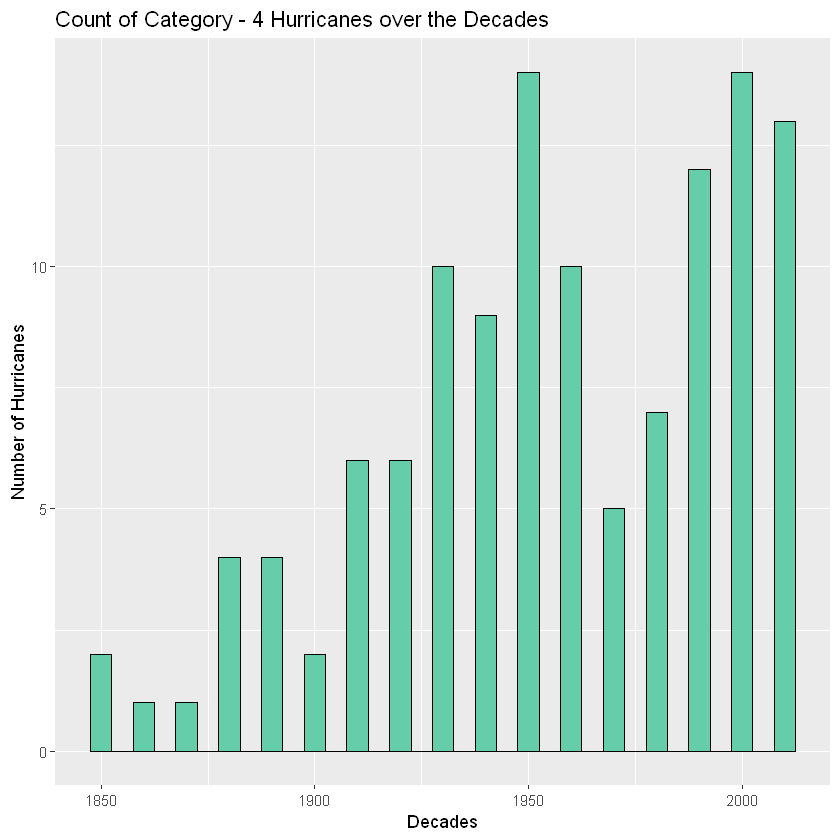

In [8]:
ggplot(Huri_Cat4, aes(x=Decade)) + 
geom_histogram(binwidth=5, color = "black", fill = "aquamarine3" )+
#geom_smooth(method = "loess", se = FALSE)+
labs(x = "Decades", y = "Number of Hurricanes", 
     title = "Count of Category - 4 Hurricanes over the Decades")

In [9]:
count_5 <- group_by(Hurricane_Cat5, Decade)
count_5 <- summarize(count_5, count = n())
count_5 <- rbind(count_5,c(1940,0))
count_5

Decade,count
1920,2
1930,6
1950,2
1960,4
1970,3
1980,3
1990,2
2000,8
2010,3
1940,0


Decade - 1940 has not seen any category 5 Hurricanes, so we have added the one row 1940 with 0 into count_5 table.

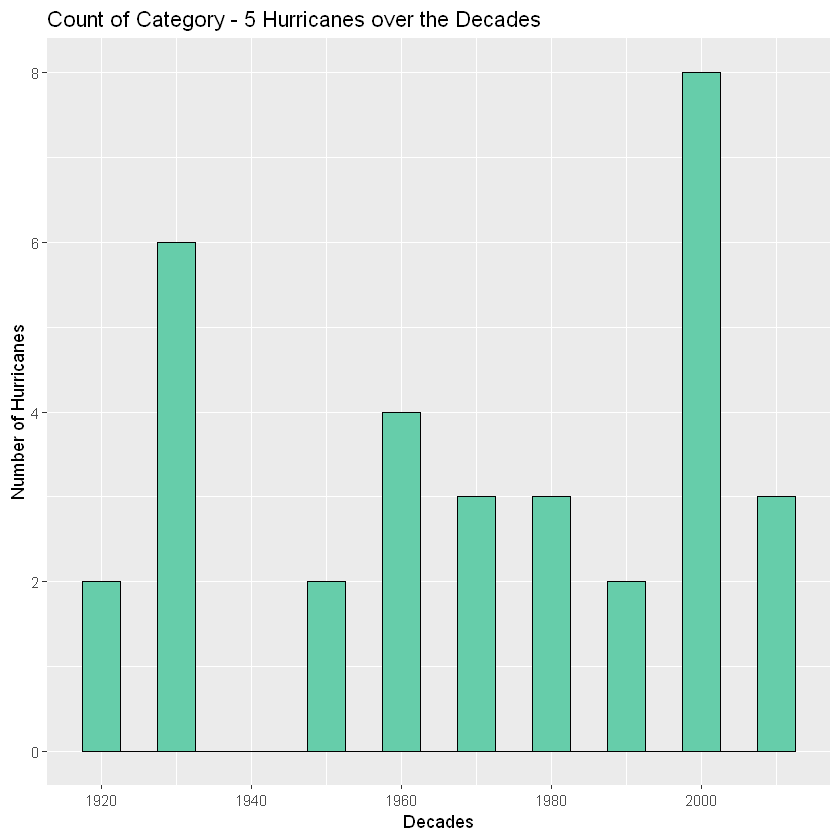

In [10]:
ggplot(Hurricane_Cat5, aes(x=Decade)) + 
geom_histogram(binwidth=5, color = "black", fill = "aquamarine3" )+
#geom_smooth(method = "loess", se = FALSE)+
labs(x = "Decades", y = "Number of Hurricanes",
     title = "Count of Category - 5 Hurricanes over the Decades")

In [11]:
#Combine Cat4 and Cat5 at name and year, max speed, minimun pressure
Master <- rbind(Huri_Cat4[,c(1,9,4,7)], Hurricane_Cat5[,c(1,12,4,5)])

In [12]:
count <- group_by(Master, Decade)
count <- summarize(count, count = n())
count

Decade,count
1850,2
1860,1
1870,1
1880,4
1890,4
1900,2
1910,6
1920,8
1930,16
1940,9


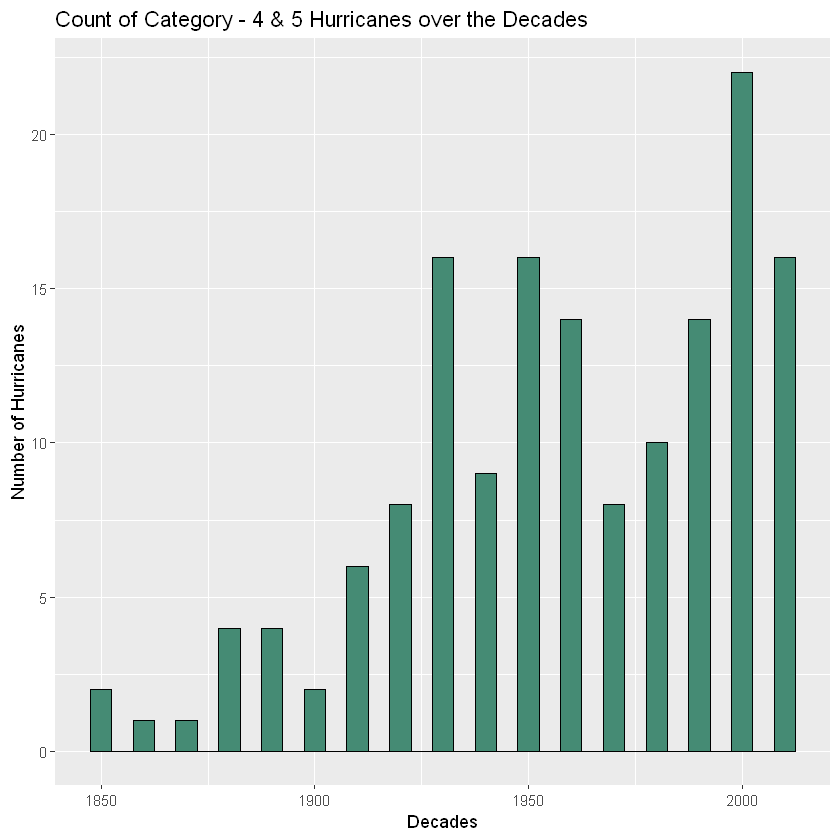

In [13]:
ggplot(Master, aes(x=Decade)) + 
geom_histogram(binwidth=5, color = "black", fill = "aquamarine4" )+
#geom_smooth(method = "loess", se = FALSE)+
labs(x = "Decades", y = "Number of Hurricanes", 
     title = "Count of Category - 4 & 5 Hurricanes over the Decades")

#### Observation

An interesting observation that can be seen here is the increase trend in the total number of hurricane per decade that we have seen since 1850.

Calculating some Desciptive Statistics for the Category 4, Category 5 and master data.

In [14]:
# Calculating the parameters for category 4
mean_4 = mean(count_4$count)
var_4 = var(count_4$count)
sd_4 = sd(count_4$count)
med_4 = median(count_4$count)
max_4 = max(count_4$count)
min_4 = min(count_4$count)

print(paste("Category 4 Mean value - ", mean_4))
print(paste("Category 4 Varaince value - ", var_4))
print(paste("Category 4 SD value - ", sd_4))
print(paste("Category 4 Median value - ", med_4))
print(paste("Category 4 Max value - ", max_4))
print(paste("Category 4 Min value - ", min_4))

[1] "Category 4 Mean value -  7.05882352941176"
[1] "Category 4 Varaince value -  20.4338235294118"
[1] "Category 4 SD value -  4.52037869314195"
[1] "Category 4 Median value -  6"
[1] "Category 4 Max value -  14"
[1] "Category 4 Min value -  1"


In [15]:
# Calculating the parameters for category 5
mean_5 = mean(count_5$count)
var_5 = var(count_5$count)
sd_5 = sd(count_5$count)
med_5 = median(count_5$count)
max_5 = max(count_5$count)
min_5 = min(count_5$count)

print(paste("Category 5 Mean value - ", mean_5))
print(paste("Category 5 Varaince value - ", var_5))
print(paste("Category 5 SD value - ", sd_5))
print(paste("Category 5 Median value - ", med_5))
print(paste("Category 5 Max value - ", max_5))
print(paste("Category 5 Min value - ", min_5))

[1] "Category 5 Mean value -  3.3"
[1] "Category 5 Varaince value -  5.12222222222222"
[1] "Category 5 SD value -  2.26323269290239"
[1] "Category 5 Median value -  3"
[1] "Category 5 Max value -  8"
[1] "Category 5 Min value -  0"


In [16]:
# Calculating the parameters for category 4 and 5 clubbed together
mean_all = mean(count$count)
var_all = var(count$count)
sd_all = sd(count$count)
med_all = median(count$count)
max_all = max(count$count)
min_all = min(count$count)

print(paste("Category 4 & 5 Mean value - ", mean_all))
print(paste("Category 4 & 5 Varaince value - ", var_all))
print(paste("Category 4 & 5 SD value - ", sd_all))
print(paste("Category 4 & 5 Median value - ", med_all))
print(paste("Category 4 & 5 Max value - ", max_all))
print(paste("Category 4 & 5 Min value - ", min_all))

[1] "Category 4 & 5 Mean value -  9"
[1] "Category 4 & 5 Varaince value -  40.875"
[1] "Category 4 & 5 SD value -  6.39335592627221"
[1] "Category 4 & 5 Median value -  8"
[1] "Category 4 & 5 Max value -  22"
[1] "Category 4 & 5 Min value -  1"


# Fitting Distribution

Poisson distribution is popular for modelling the number of times an event occurs in an interval of time or space, let us consider modelling the data into Poisson Distribution. We can also consider negative binomial distribution as that can also be a good fit for the problem at hand.

### Poisson Distribution

Each storm is considered as a point event in time, occurring independently. If λ is a measure of the historically based number of events per decade, then P(X = x | λ) defines the probability of having x events per year, which is given by the Poisson probability distribution function (PDF) –
$$ P(x) = \frac{\lambda^x}{x!}\ e^{-\lambda} $$

The parameter of the Poisson distribution λ can be estimated from data –
$$ λ =  \frac{\sum_{i=1}^{N}x_i}{N} $$


#### Parameters Estimation

The parameter for Poisson distribution is estimated and results are presented below - 

In [17]:
lambda_4 <- mean_4
print(paste("lamba value for category 4 hurricanes - ",lambda_4 ))

[1] "lamba value for category 4 hurricanes -  7.05882352941176"


In [18]:
lambda_5 <- mean_5
print(paste("lamba value for category 4 hurricanes - ",lambda_5 ))

[1] "lamba value for category 4 hurricanes -  3.3"


In [19]:
lambda <- mean_all
print(paste("lambda value for category 4 & 5 hurricanes - ",lambda ))

[1] "lambda value for category 4 & 5 hurricanes -  9"


#### Density Plots

Based on the calculated values of the lambda following density plots are obtained for the category 4, category 5 and combined hurricane distributions.

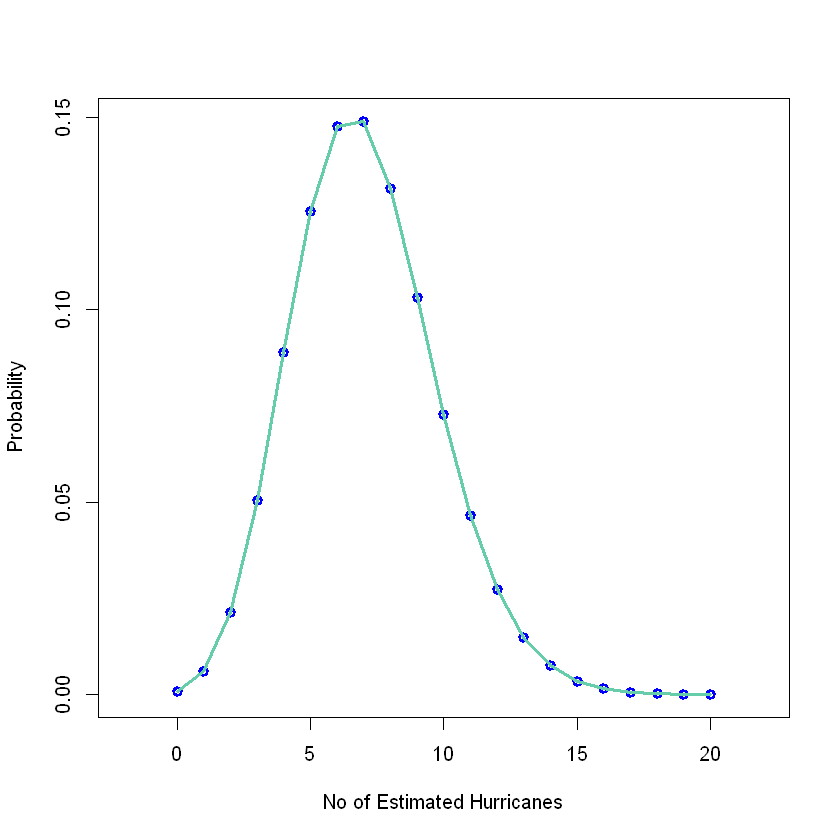

In [20]:
#Plotting the poisson distribution for category 4
plot(0:20, dpois( x=0:20, lambda=lambda_4 ), 
     xlim=c(-2,22),col = 'blue', lwd= 3, 
     xlab="No of Estimated Hurricanes", ylab="Probability")

lines(0:20,dpois( x=0:20, lambda=lambda_4 ), 
      xlim=c(-2,22), col="aquamarine3",lwd = 3 )

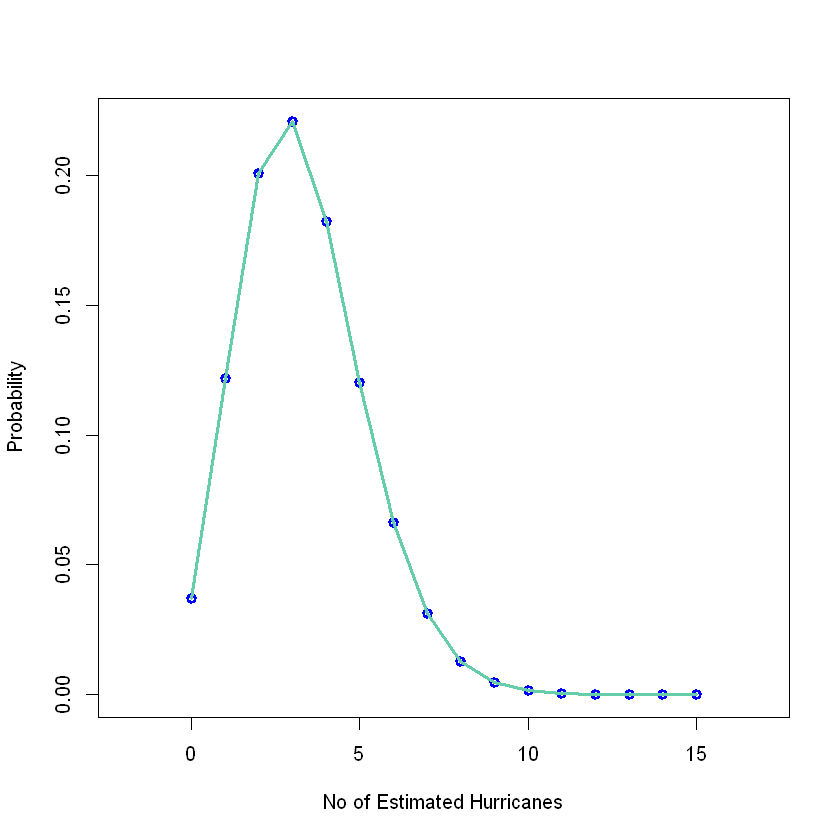

In [21]:
#Plotting the poisson distribution for category 5
plot(0:15, dpois( x=0:15, lambda=lambda_5 ), 
     xlim=c(-2,17), col = 'blue', lwd= 3, 
     xlab="No of Estimated Hurricanes", ylab="Probability")

lines(0:15,dpois( x=0:15, lambda=lambda_5 ), 
      xlim=c(-2,17), col="aquamarine3", lwd = 3)

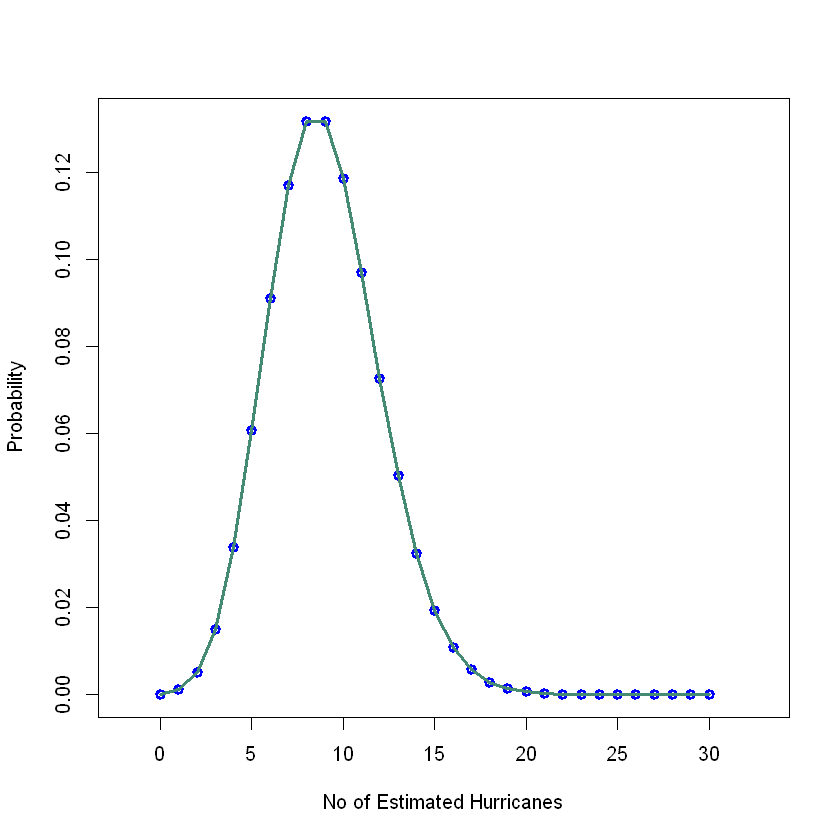

In [22]:
#Plotting the poisson distribution for category 4 & 5 together
plot(0:30, dpois( x=0:30, lambda=lambda ), 
     xlim=c(-2,33), col = 'blue', lwd= 3, 
     xlab="No of Estimated Hurricanes", ylab="Probability")

lines(0:30,dpois( x=0:30, lambda=lambda ), 
      xlim=c(-2,33), col="aquamarine4", lwd = 3)

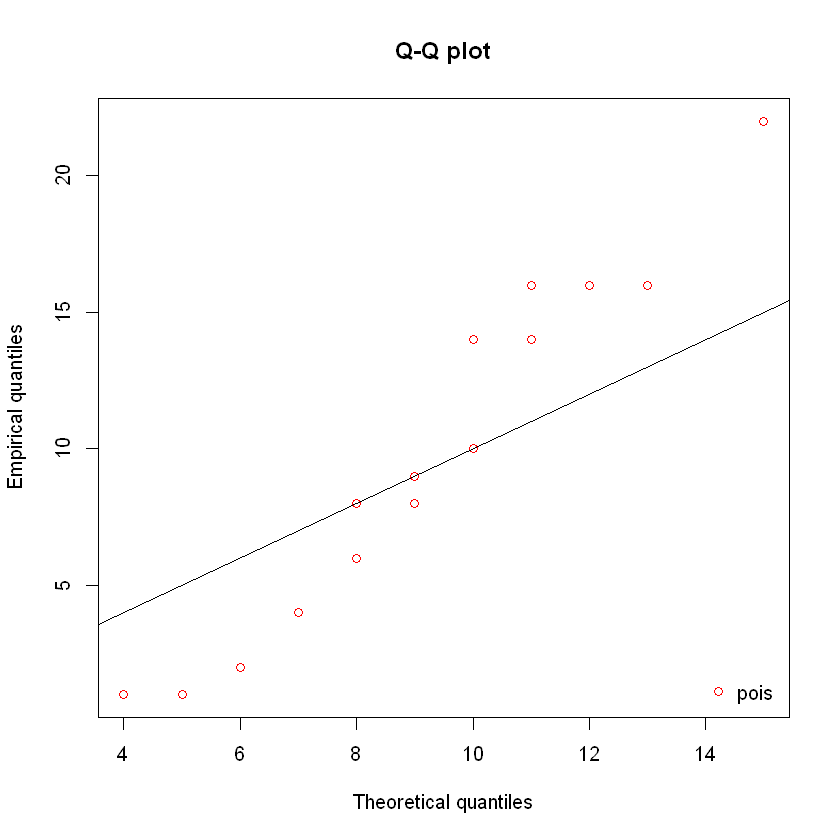

In [23]:
qqcomp(fitdist(count$count, "pois"))

The Q-Q plot does seem to be good fit, but for a Poisson Distribution, we have mean = variance, but does not seem to be the case with your distribution,

For Category 4 and 5 together, we have 

    mean < variance 
    (9 < 40.875)
    
This could be a case of **OverDispered Poisson.**

The negative binomial distribution, can be used as an alternative to the Poisson distribution. It is especially useful for discrete data over an unbounded positive range whose sample variance exceeds the sample mean. In such cases, the observations are overdispersed with respect to a Poisson distribution, for which the mean is equal to the variance. Hence a Poisson distribution is not an appropriate model. Since the negative binomial distribution has one more parameter than the Poisson, the second parameter can be used to adjust the variance independently of the mean.
    


### Negative Binomial Distribution

Let's now look at the negative binomial distribution Q-Q plot.

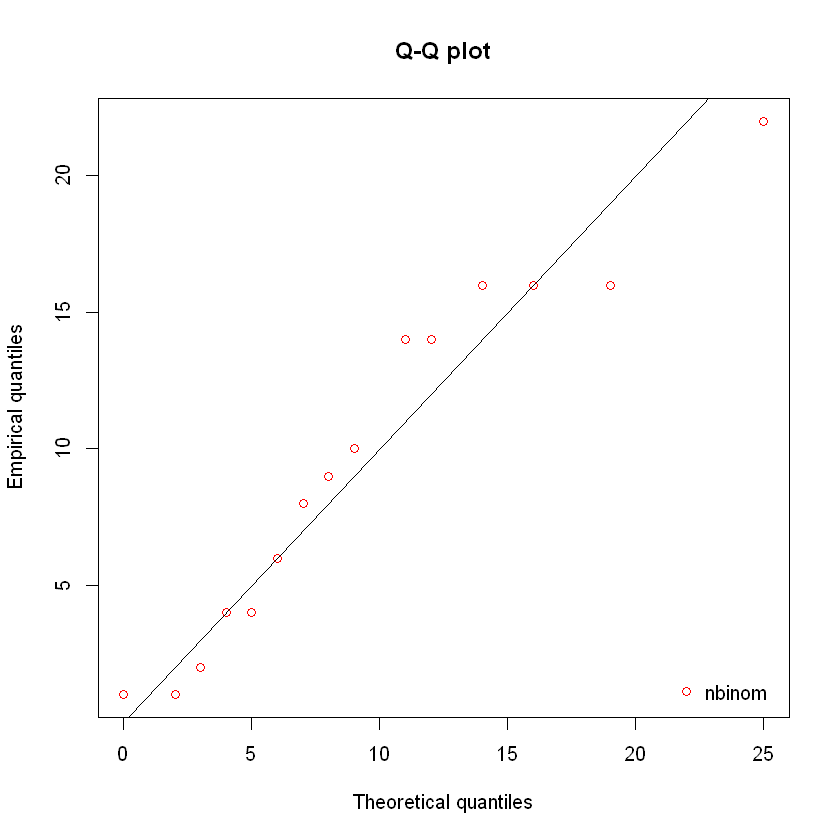

In [24]:
qqcomp(fitdist(count$count, "nbinom"))

#### Parameter Estimation

Looks like the Negative binomial is better fit than the poisson distribution. Let us estimate the parameters for the negative binomical distribution NB(r,p). We need to calculate the r and p

$$ r = \frac{\mu^{2}}{\sigma^{2} - \mu} $$


$$ p = \frac{\sigma^{2} - \mu}{\sigma^{2}} $$

In [25]:
r = mean_all*mean_all / (var_all - mean_all)
print(r)

[1] 2.541176


In [26]:
p = (var_all-mean_all )/ var_all 
print(p)

[1] 0.7798165


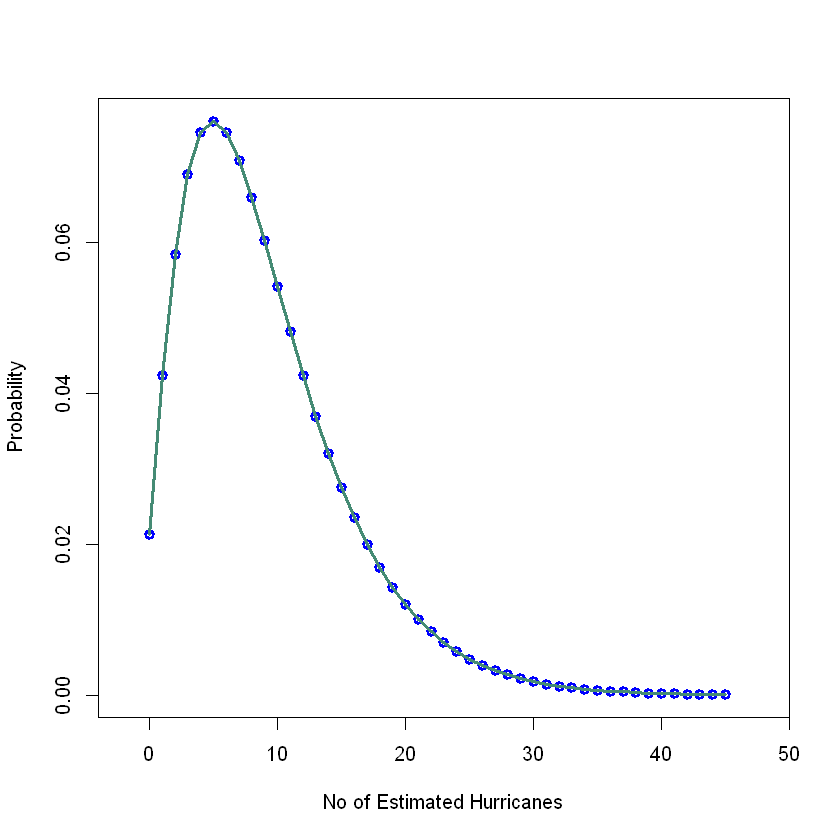

In [27]:
#Plotting the poisson distribution for category 4 & 5 together
plot(0:45, dnbinom( x=0:45, mu = mean_all, size = r), 
     xlim=c(-2,48), col = 'blue', lwd= 3, 
     xlab="No of Estimated Hurricanes", ylab="Probability")

lines(0:45,dnbinom( x=0:45, mu = mean_all, size = r),
      xlim=c(-2,48), col="aquamarine4", lwd =3)

### Non-homogenous Poisson Distribution

As mentioned earlier, we have noticed an increase in hurricanes over time, we now try to look at some other approach that addresses this effect.

Earlier we observed that the Hurricane data was not fitting a Poisson distribution as the parameter ${\lambda}$ was constant. Now we try to implement poisson distribution with varying ${\lambda}$ and make observations.  

In [28]:
#Caluclating lambda with respect to past hurricanes with that particular decade
sum = 0
for (i in c(1:nrow(count))){
    sum = sum + count$count[i]
    count$lambda_curr[i] <- sum/i
}

Warning message:
"Unknown or uninitialised column: 'lambda_curr'."

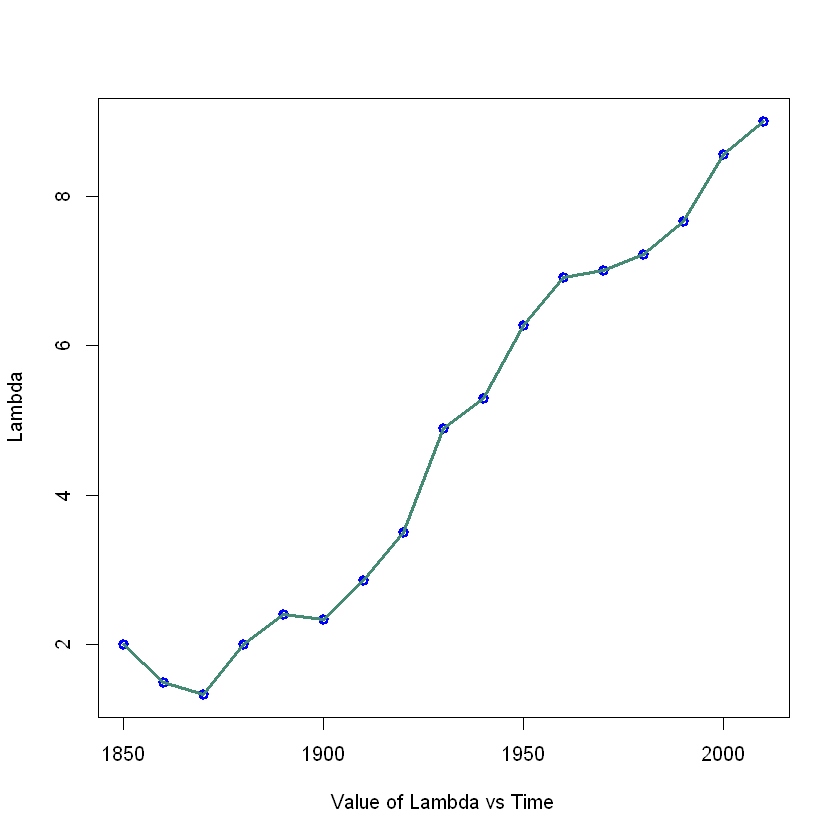

In [29]:
#plotting the lambda value
plot(count$Decade,count$lambda_curr,  col = 'blue', 
     lwd= 3, xlab="Value of Lambda vs Time", ylab="Lambda")

lines(count$Decade,count$lambda_curr, col="aquamarine4", lwd =3)

In [30]:
count

Decade,count,lambda_curr
1850,2,2.000000
1860,1,1.500000
1870,1,1.333333
1880,4,2.000000
1890,4,2.400000
1900,2,2.333333
1910,6,2.857143
1920,8,3.500000
1930,16,4.888889
1940,9,5.300000


Clearly we can see an increase in Lambda values (Poisson) with respect to decade(time). We try to find the relationship between lambda and time by fitting a regression model as the trend observed is linear.

In [31]:
#Fitting a linear model to estimate the coefficient and intercept
fit = lm(count$lambda_curr~count$Decade)

In [32]:
summary(fit)


Call:
lm(formula = count$lambda_curr ~ count$Decade)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.87015 -0.28807  0.03485  0.20484  1.37360 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)  -94.725725   5.549659  -17.07 3.09e-11 ***
count$Decade   0.051542   0.002875   17.93 1.53e-11 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.5806 on 15 degrees of freedom
Multiple R-squared:  0.9554,	Adjusted R-squared:  0.9525 
F-statistic: 321.5 on 1 and 15 DF,  p-value: 1.526e-11


So the obtained linear equation of lambda with respect to time from the regression model is  - 

$$ {\hat\lambda} = 0.051542 * Decade - 94.725725 $$

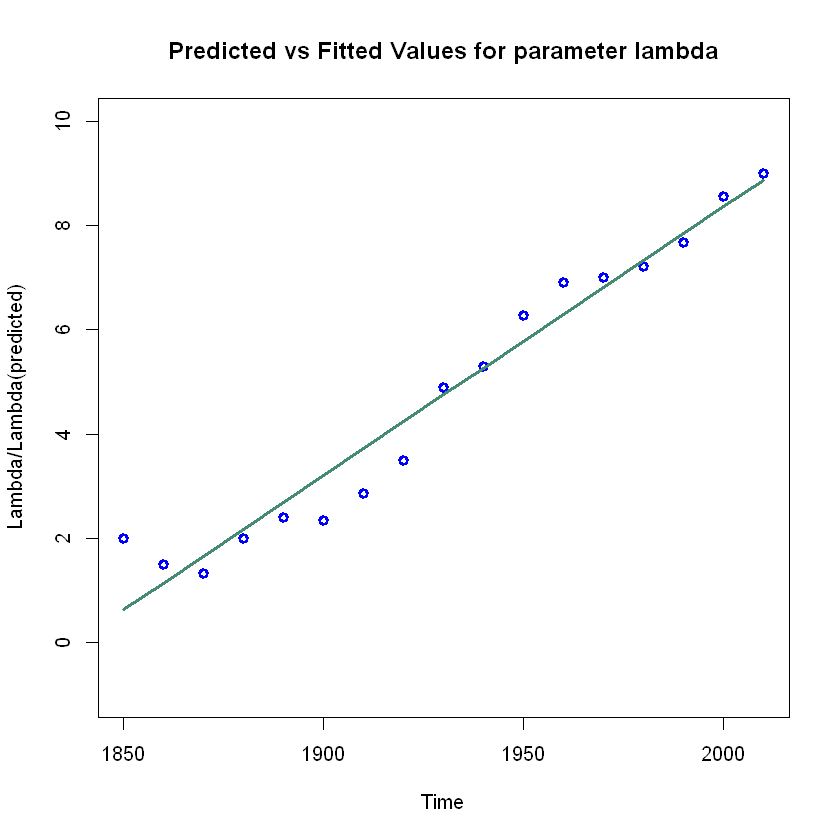

In [33]:
plot(count$Decade,count$lambda_curr,  col = 'blue',
     ylim=c(-1,10),  lwd= 3, xlab="Time", ylab="Lambda/Lambda(predicted)")

lines(count$Decade, (0.051542 * count$Decade - 94.725725), 
      ylim=c(-1,10), col="aquamarine4", lwd =3)

title ("Predicted vs Fitted Values for parameter lambda")

Now lets check the predicted value of lambda for the upcoming decade 2020

In [34]:
lambda_2020 = 0.051542 * 2020 - 94.725725
lambda_2020

[1] 9.389115

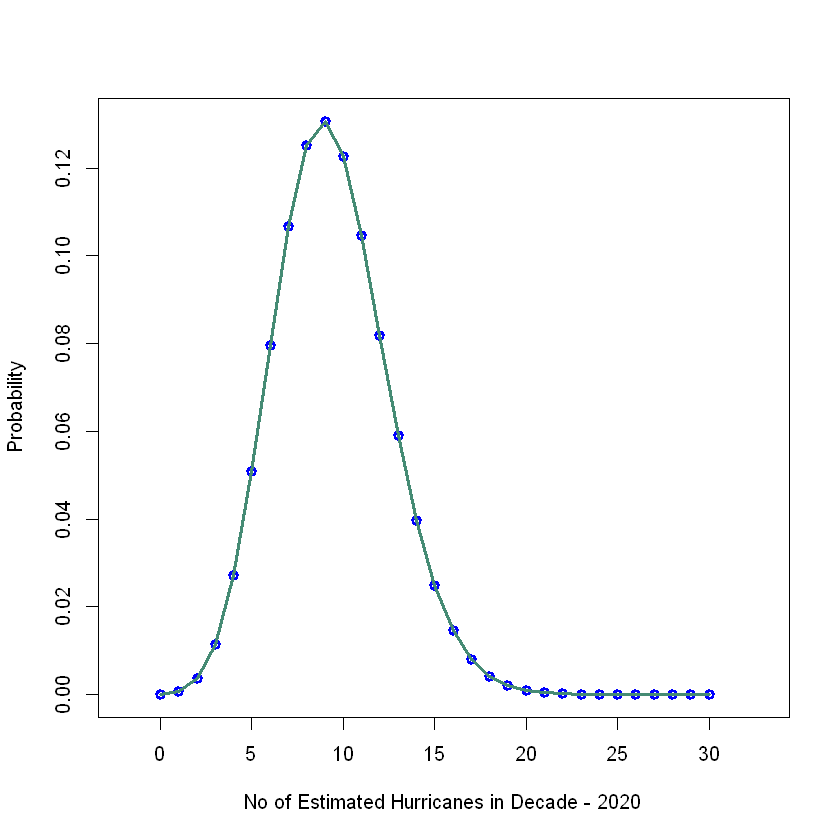

In [35]:
#Plotting the poisson distribution for category 4 & 5 together for decade 2020
plot(0:30, dpois( x=0:30, lambda=lambda_2020 ), 
     xlim=c(-2,33), col = 'blue', lwd= 3, 
     xlab="No of Estimated Hurricanes in Decade - 2020", 
     ylab="Probability")

lines(0:30,dpois( x=0:30, lambda=lambda_2020 ), 
      xlim=c(-2,33), col="aquamarine4", lwd = 3)

Surely considering lambda as a factor of time might not be right way to look at the problem, but the idea of lambda being dependant on various factors should be considered. Various factors that influence the lambda value are discussed in next section.

## Reasons for Increase in Hurricanes

Recent increases in Hurricanes can be in partly, due to the higher sea temperatures in the region that Atlantic hurricanes form in and move through.
Numerous factor influence the sea surface temperature -

    -Natural variability
    -Human-induced emissions of heat-trapping gases and Particulate pollution
   
Some studies suggest that natural variability, which includes the **Atlantic Multidecadal Oscillation (AMO)**, is the dominant cause of the warming trend in the Atlantic. Atlantic Multidecadal Oscillation (AMO) is a climate cycle that affects the sea surface temperature (SST) of the North Atlantic Ocean based on different modes on multidecadal timescales.


Like we just considered the time for measuring lambda for poisson distribution, similarly taking the above factors into consideration and modelling the hurricane data based on new data will give us a better distribution fit.

#### References : 


1) https://en.wikipedia.org/wiki/Atlantic_multidecadal_oscillation


2) https://nca2014.globalchange.gov/report/our-changing-climate/changes-hurricanes#statement-16558

